# Data cleaning and preprocessing

<p>The following notebook provides script of cleaning and preprocessing of the data collected through gsmarena.com.
The general sequence of steps I followed are:
    
1. [Droping columns and rows with predefined thresholds of missing values](#load)
2. [Cleaning and transforming the data, saving into csv](#func) 

 <h2>1.Droping columns and rows with predefined thresholds of missing values</h2> <a name="load"></a>

In [1]:
#importing the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#importing the data
data=pd.read_csv("Final_data_gsm.csv")

In [3]:
#data overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 70 columns):
Unnamed: 0       4 non-null object
2G bands         4874 non-null object
3.5mm jack       4843 non-null object
3G bands         2946 non-null object
4G bands         1279 non-null object
5G               5 non-null object
Alarm            228 non-null object
Alert types      1238 non-null object
Announced        4864 non-null object
Audio quality    422 non-null object
Battery life     313 non-null object
Bluetooth        4872 non-null object
Browser          1819 non-null object
Build            381 non-null object
CPU              2961 non-null object
Call records     1796 non-null object
Camera           395 non-null object
Card slot        4874 non-null object
Charging         412 non-null object
Chipset          2388 non-null object
Clock            228 non-null object
Colors           4567 non-null object
Dimensions       4859 non-null object
Display          322 non-null ob

In [4]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum()) #considering everything a duplicate except the first occurence
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])#if the columns are with single value we will not use them

Duplicates: 0
Missing values: 170627
Single valued columns: Index(['Five', 'Infrared port'], dtype='object')


There are a lot of missing values, because of the diversity of phone features and their inavailability for other models of phones.
Since we are interested in price, let's drop all the observations lacking price and then deal with the rest of the missing data.


In [5]:
#Dropping observations with no price
data.dropna(subset=["Price"], inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 0 to 2979
Data columns (total 70 columns):
Unnamed: 0       3 non-null object
2G bands         2980 non-null object
3.5mm jack       2968 non-null object
3G bands         2179 non-null object
4G bands         1065 non-null object
5G               5 non-null object
Alarm            0 non-null object
Alert types      370 non-null object
Announced        2979 non-null object
Audio quality    422 non-null object
Battery life     313 non-null object
Bluetooth        2979 non-null object
Browser          890 non-null object
Build            369 non-null object
CPU              2214 non-null object
Call records     730 non-null object
Camera           394 non-null object
Card slot        2980 non-null object
Charging         380 non-null object
Chipset          1819 non-null object
Clock            0 non-null object
Colors           2939 non-null object
Dimensions       2977 non-null object
Display          322 non-null object
Du

In [7]:
#kepping columns with at least 75% of non-null values
data.dropna(thresh=len(data)*0.75, axis=1,inplace=True)

In [8]:
#keeping rows having values in all 25 columns
data.dropna(thresh=25, axis=0,inplace=True)

In [9]:
#having an overview of all the variables and their categories via value_counts()
for colname in data.columns.tolist():
    print(colname)
    print("--------------------------")
    print(data[colname].value_counts())

2G bands
--------------------------
GSM 850 / 900 / 1800 / 1900                                             735
GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2                             644
GSM 850 / 900 / 1800 / 1900 - SIM 1 & SIM 2 (dual-SIM model only)       148
GSM 900 / 1800 - SIM 1 & SIM 2                                           92
GSM 900 / 1800 / 1900                                                    88
 N/A                                                                     84
CDMA 800 / 1900                                                          70
GSM 900 / 1800 / 1900 - SIM 1 & SIM 2                                    68
GSM 850 / 900 / 1800 / 1900 - all versions                               29
GSM 900 / 1800                                                           17
GSM 850 / 900 / 1800 / 1900 - SIM 1                                       6
GSM 850 / 900 / 1800 / 1900 - all models                                  5
CDMA 800 / 1700 / 1900 / 2100                       

5.0 inches, 68.9 cm2 (~66.9% screen-to-body ratio)      13
5.5 inches, 83.4 cm2 (~70.6% screen-to-body ratio)      12
5.0 inches, 68.9 cm2 (~67.9% screen-to-body ratio)      11
5.5 inches, 83.4 cm2 (~71.7% screen-to-body ratio)      11
5.0 inches, 68.9 cm2 (~66.7% screen-to-body ratio)      10
4.0 inches, 45.5 cm2 (~58.3% screen-to-body ratio)      10
4.0 inches, 45.5 cm2                                     9
5.0 inches, 68.9 cm2                                     9
4.0 inches, 45.5 cm2 (~56.9% screen-to-body ratio)       9
5.5 inches, 83.4 cm2 (~72.2% screen-to-body ratio)       9
5.0 inches, 68.9 cm2 (~65.9% screen-to-body ratio)       8
5.0 inches, 68.9 cm2 (~63.8% screen-to-body ratio)       8
5.0 inches, 68.9 cm2 (~67.7% screen-to-body ratio)       8
5.2 inches, 74.5 cm2 (~68.6% screen-to-body ratio)       8
5.0 inches, 68.9 cm2 (~66.2% screen-to-body ratio)       8
5.0 inches, 68.9 cm2 (~68.4% screen-to-body ratio)       7
5.5 inches, 83.4 cm2 (~69.0% screen-to-body ratio)      

In [10]:
#will drop Type USB and Single as they have too many categories
data.drop(["Type","USB", "Single"], axis=1, inplace=True)

 <h2>2.Cleaning and transforming the data,saving into csv</h2> <a name="func"></a>
 <h3> I manipulated with every single column separately, to attain better variables </h3>

In [11]:
data["2G bands"]=data["2G bands"].apply(lambda x: x.split("/")[0])
data["Announced"]=data["Announced"].apply(lambda x:x.split(",")[0].split(".")[0].strip())
data["Bluetooth"]=data["Bluetooth"].apply(lambda x: x.split(",")[0].split("/")[0].split("(")[0].strip().replace("v","").replace("x","0"))
data["Loudspeaker "]=data["Loudspeaker "].apply(lambda x:x.split(" ")[0].replace(",","").strip())
data["OS"]=data["OS"].apply(lambda x:x.split(" ")[0].strip().replace(",",""))
#leaving price in eur
data["Price"]=data["Price"].apply(lambda x:float(x.lower().replace("about","").split("eur")[0]))   
#card slot 
data["Card slot"]=data["Card slot"].apply(lambda x: x.split("up to")[-1].split("(")[0].split(",")[-1].replace("included","").strip())
data["Colors"]=data["Colors"].apply(lambda x: x.split(",")[0].split("/")[0].split(" ")[-1].lower().replace("(","").replace(")",""))

In [12]:
#transforming Dimensions
data["Dimensions"]=data["Dimensions"].apply(lambda x: x.split("mm")[0].split(" ")[0])
data["Dimensions"][data.Dimensions=="-"]=0
data["Dimensions"]=data["Dimensions"].apply(lambda x:float(x))

C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


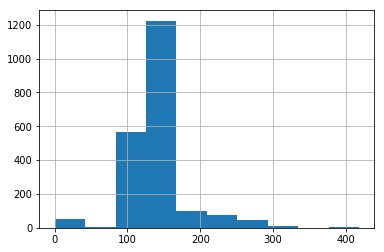

In [13]:
#distribution is left skewed thus we will fill missing values with median
data.Dimensions.hist()
plt.show()

In [14]:
#Data is left skewed, thus we will take median to be robust to outliers and fill with them the already converted to 0 "-" values
data.Dimensions[data.Dimensions==0]=data.Dimensions.median()

C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
#Transforming GPS data
data["GPS"]=data["GPS"].apply(lambda x:x.split(" ")[0].replace(",","").replace(";",""))
data["GPS"][data["GPS"]=="A-GPS"]="Yes"
data["GPS"][data["GPS"]=="TBD"]="No"

C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [16]:
#leaving internal memory in mbs
data["Internal"]=data["Internal"].apply(lambda x:x.split(" ")[0].split("/")[0].replace(";","").lower())

In [17]:
def gb_to_mb(x):
    '''function converting gbs into mbs'''
    if "gb" in x:
        x=float(x.split("gb")[0])
    elif "mb" in x:
        x=float(x.split("mb")[0])
    return x

In [18]:
#transforming GBs into MBs
data["Internal"]=data["Internal"].apply(gb_to_mb)

In [19]:
#dealing with resolution, leaving ppi density
data["Resolution"]=data["Resolution"].apply(lambda x: x.split("(")[-1].replace("ppi density)","").replace("~","").split("x")[0])
#making resolution float
data["Resolution"]=data["Resolution"].apply(lambda x:float(x))

In [20]:
#outlining status
data["Status"]=data["Status"].apply(lambda x:x.split(" ")[0].replace(".",""))
#technology
data["Technology"]=data["Technology"].apply(lambda x:x.split("/")[0].strip())

data["WLAN"]=data["WLAN"].apply(lambda x:x.split(" ")[0])
data["Weight"]=data["Weight"].apply(lambda x:x.split("g")[0].split("(")[0].replace("~",""))
#Weight in grams
data["Weight"][data.Weight=="-"]=0
data["Weight"]=data["Weight"].apply(lambda x:float(x))
data["model_name"]=data["model_name"].apply(lambda x:x.split(" ")[0].strip().lower())
data["Battery"]=data["Battery"].apply(lambda x:x.split(" ")[0])
                                  
#cleaning SIM
data["SIM"]=data["SIM"].apply(lambda x: x.split("SIM")[0].replace("-","").lower().strip())

C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [21]:
#transforming size, leving size in inches
data["Size"]=data["Size"].apply(lambda x:x.split("inches")[0])
data["Size"]=data["Size"].apply(lambda x:float(x))

In [22]:
data["Radio"][data["Radio"]=="To be confirmed"]="No"

C:\Users\Srbuhi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
data["Radio"]=data["Radio"].apply(lambda x:x.strip().lower().split(" ")[0])

In [24]:
#Final dataset overview
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2079 entries, 0 to 2978
Data columns (total 22 columns):
2G bands        2079 non-null object
3.5mm jack      2079 non-null object
Announced       2079 non-null object
Bluetooth       2079 non-null object
Card slot       2079 non-null object
Colors          2079 non-null object
Dimensions      2079 non-null float64
GPS             2079 non-null object
Internal        2079 non-null object
Loudspeaker     2079 non-null object
OS              2079 non-null object
Price           2079 non-null float64
Radio           2079 non-null object
Resolution      2079 non-null float64
SIM             2079 non-null object
Size            2079 non-null float64
Status          2079 non-null object
Technology      2079 non-null object
WLAN            2079 non-null object
Weight          2079 non-null float64
model_name      2079 non-null object
Battery         2079 non-null object
dtypes: float64(5), object(17)
memory usage: 373.6+ KB


In [25]:
#saving the data into csv format
data.to_csv("modelling_data.csv", header=True, index=False)